Доходы от продаж, полученных в результате рекламной компании по ТВ, радио, газетам.

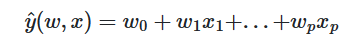

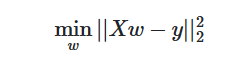

In [4]:
!py -m pip install yellowbrick

zsh:1: command not found: py


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import skew
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from yellowbrick.regressor import PredictionError, ResidualsPlot
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = (12, 8)
print("libraries imported..")

libraries imported..


In [6]:
df = pd.read_csv("Advertising.csv")
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [7]:
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [11]:
df.drop(df.columns[[0]], axis = 1, inplace = True) 

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [13]:
df['sales']

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [14]:
df.TV.corr(df.sales)

np.float64(0.7822244248616066)

In [15]:

df.radio.corr(df.sales)

np.float64(0.5762225745710553)

In [16]:

df.newspaper.corr(df.sales)

np.float64(0.22829902637616536)

In [17]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


<Axes: >

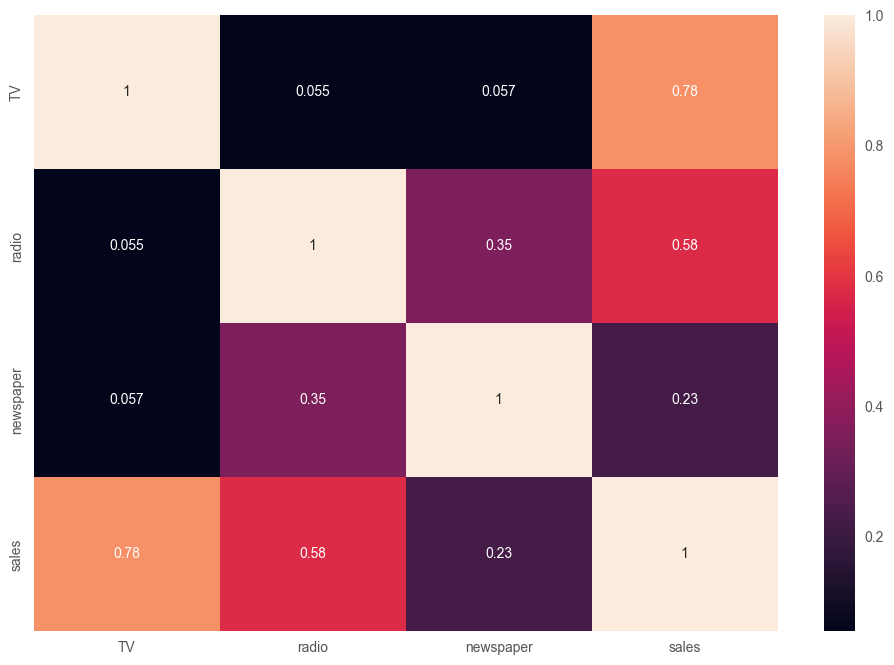

In [18]:

sns.heatmap(df.corr(),annot=True)

In [19]:
X = df[['newspaper']]
X.head()

,newspaper
0,69.2
1,45.1
2,69.3
3,58.5
4,58.4


M = 10
X_base = df[['newspaper']].copy()
for i in range(2,M+1):
    X_base['newspaper']*= X_base['newspaper']
    

In [20]:
y = df.sales
type(y)

pandas.core.series.Series

In [21]:
X_train,X_test, y_train, y_test = train_test_split(X,y, random_state=1)

In [22]:
lr_m0 = LinearRegression()
lr_m0.fit(X_train, y_train)

LinearRegression()

In [23]:
print(lr_m0.intercept_)
print(lr_m0.coef_)

11.765576707409684
[0.06888299]


In [24]:
# b0,b1.увеличение расходов на 1 (для газет) связано с увеличением выручки на 0.068

In [25]:
y_pred = lr_m0.predict(X_test) 
y_pred[:5] 

array([14.36246531, 13.94227909, 12.27531081, 13.23967263, 13.83206631])

In [26]:
mean_squared_error(y_test, y_pred)

np.float64(25.196780034607823)

In [27]:
from sklearn.preprocessing import maxabs_scale
X = df[['newspaper']].copy()
X_maxabs = maxabs_scale(X, axis=0)

In [28]:
X_maxabs

array([[0.60701754],
       [0.39561404],
       [0.60789474],
       [0.51315789],
       [0.5122807 ],
       [0.65789474],
       [0.20614035],
       [0.10175439],
       [0.00877193],
       [0.18596491],
       [0.2122807 ],
       [0.03508772],
       [0.57807018],
       [0.06315789],
       [0.40350877],
       [0.46403509],
       [1.        ],
       [0.48947368],
       [0.16052632],
       [0.16754386],
       [0.46842105],
       [0.20614035],
       [0.43508772],
       [0.22982456],
       [0.16052632],
       [0.17105263],
       [0.11052632],
       [0.20087719],
       [0.20087719],
       [0.35789474],
       [0.37894737],
       [0.33859649],
       [0.26315789],
       [0.00263158],
       [0.06491228],
       [0.0745614 ],
       [0.04385965],
       [0.40087719],
       [0.30789474],
       [0.28070175],
       [0.27719298],
       [0.33947368],
       [0.01578947],
       [0.23157895],
       [0.37982456],
       [0.27631579],
       [0.31315789],
       [0.162

In [29]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)
X_poly = poly.fit_transform(X_maxabs)
X_poly

array([[1.00000000e+00, 6.07017544e-01, 3.68470299e-01],
       [1.00000000e+00, 3.95614035e-01, 1.56510465e-01],
       [1.00000000e+00, 6.07894737e-01, 3.69536011e-01],
       [1.00000000e+00, 5.13157895e-01, 2.63331025e-01],
       [1.00000000e+00, 5.12280702e-01, 2.62431517e-01],
       [1.00000000e+00, 6.57894737e-01, 4.32825485e-01],
       [1.00000000e+00, 2.06140351e-01, 4.24938443e-02],
       [1.00000000e+00, 1.01754386e-01, 1.03539551e-02],
       [1.00000000e+00, 8.77192982e-03, 7.69467528e-05],
       [1.00000000e+00, 1.85964912e-01, 3.45829486e-02],
       [1.00000000e+00, 2.12280702e-01, 4.50630963e-02],
       [1.00000000e+00, 3.50877193e-02, 1.23114805e-03],
       [1.00000000e+00, 5.78070175e-01, 3.34165128e-01],
       [1.00000000e+00, 6.31578947e-02, 3.98891967e-03],
       [1.00000000e+00, 4.03508772e-01, 1.62819329e-01],
       [1.00000000e+00, 4.64035088e-01, 2.15328563e-01],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 4.89473

In [30]:
X_train,X_test, y_train, y_test = train_test_split(X_poly,y, random_state=1)

In [31]:
lr_poly = LinearRegression()
lr_poly.fit(X_train, y_train)

LinearRegression()

In [32]:
print(lr_poly.intercept_)
print(lr_poly.coef_)

12.441580506501381
[0.         1.37334018 9.84961912]


In [33]:
y_pred = lr_poly.predict(X_test) 
mean_squared_error(y_test, y_pred)

np.float64(26.806701556925386)

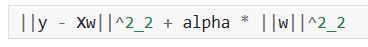

In [34]:
from sklearn.linear_model import Ridge
lr_ridge = Ridge(alpha=1.0)
lr_ridge.fit(X_train, y_train)

Ridge()

In [35]:
print(lr_ridge.intercept_)
print(lr_ridge.coef_)

12.267941747587823
[0.         4.25508987 4.23190934]


In [36]:
y_pred = lr_ridge.predict(X_test) 
mean_squared_error(y_test, y_pred)

np.float64(25.37901530264169)

# SVR

In [37]:
from sklearn.svm import SVR
svr_rbf = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)

In [38]:
svr_rbf.fit(X_train, y_train)

SVR(C=100, gamma=0.1)

In [39]:
y_pred = svr_rbf.predict(X_test)

In [40]:
mean_squared_error(y_test, y_pred)

np.float64(30.60852987485746)

In [41]:
svr_linear = SVR(kernel = 'linear', C=100, epsilon=0.1)

In [42]:
svr_linear.fit(X_train, y_train)

SVR(C=100, kernel='linear')

In [43]:
y_pred = svr_linear.predict(X_test)
mean_squared_error(y_test, y_pred)

np.float64(31.30117646689707)

In [44]:
#Задачи: Линейная регрессия
# 1. Разработать модель линейной регрессии, учитывающей все (в примере),2,3 столбца входных переменных. Рассчитать MSE. 
# Вывести значения коэффициентов модели.
# 2. Разработать модель линейной регрессии, базисные функции - полином от исходных значений. Найти зависимость MSE от
# максимальной степени полинома. (max_pow <= 10)
# 3. Регуляризация. Гребневая регрессия. Выбрать оптимальную степень полинома, 
# построить график зависимости максимального модуля параметров, MSE 
# от величины alpha.
# 4. Регуляризация. Лассо. Выбрать оптимальную степень полинома, 
# построить график зависимости максимального модуля параметров, MSE 
# от величины alpha. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html
# linear_model.Lasso(alpha=0.1)

In [ ]:
# 1.


In [45]:
#SVR
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html#sklearn.svm.SVR
# Исследовать точность модели регрессии при применении ядерных функций 'poly', 'sigmoid'
# Реализовать модель SVR учитывающую все характеристики исходных данных, выбрать модель с оптимальными параметрами.